# requests
URL로 접근하는 HTTP 요청/응답 처리 모듈
- GET
- POST
- DELETE
- PUT
- OPTIONS
- ...
* http://docs.python-requests.org/en/master/user/quickstart/



requests와 cssselect를 함께 설치해 준다.

pip

```
! pip install requests cssselect
```

Anaconda

```
! conda install -y -c conda-forge requests cssselect
```

# BeautifulSoup
Python library for pulling data out of HTML and XML file
* http://www.crummy.com/software/BeautifulSoup/bs4/doc/

```
! conda install -y -c conda-forge bs4
```

# Requests Quick Start

Python [requests](http://docs.python-requests.org/en/v1.0.0/) 모듈은 사람에 친숙한 apache HTTP 라이브러리다. urllib2는 표준적인 HTTP를 제공하지만 대부분 다른 시간, 다른 웹 환경에서 개발되어 왔다.


In [1]:
import requests
from bs4 import BeautifulSoup

## requests 사용해보기

HTTP method 에 적절한 함수를 사용한다.

```
response = requests.get('https://www.naver.com')
                    .post
                    .put
                    .delete
                    .head
                    .options
                    .trace
```

```python
>>> r = requests.get('https://api.github.com/user', auth=('user', 'pass'))
>>> r.status_code
200
>>> r.headers['content-type']
'application/json; charset=utf8'
>>> r.encoding
'utf-8'
>>> r.text
u'{"type":"User"...'
>>> r.json
{u'private_gists': 419, u'total_private_repos': 77, ...}
```

Response 객체를 반환한다.

In [ ]:
r = requests.get('https://github.com/qkboo')

In [3]:
response = requests.get('https://www.naver.com')

In [4]:
type(response)

requests.models.Response

In [ ]:
type(r)

### Response 객체

Get 의 [반환 객체](http://docs.python-requests.org/en/v1.0.0/user/quickstart/#response-content)는 requests.structures.CaseInsensitiveDict 타입,

모든 요청에는 헤더와 바디가 있는데 바디부분은 bytes로 반환을 한다.

반환 객체의 내용은 텍스트 문자열은 `.text`, 바이너리는 `.content` 로 접근한다.

상태 코드

In [6]:
response.status_code #return 200번이 아닌 경우 확인 필요

200

#### response.text

문자열 데이터를 반환시 response.text 호출하면 유니코드로 변환한 내용이 반환된다. 


In [7]:
response.text[:400]

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>'

In [8]:
len(response.text)

184653

In [9]:
response.encoding

'UTF-8'

In [10]:
response.json()

JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [11]:
response.headers

{'Server': 'NWS', 'Date': 'Mon, 21 Nov 2022 06:18:32 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=8542eea8ea06f522f2e53210d5220c5b6a9fb246c0768589862ade3b8b7aaae4; Expires=Tue, 22 Nov 2022 06:18:32 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
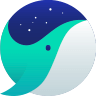
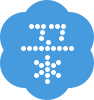

In [12]:
response.content

#### response.content

모든 요청에는 헤더와 바디가 있는데 바디부분을 bytes로 반환을 한다. 그래서 텍스트를 .content 로 반환시 유니코드로 디코딩해서 반환한다.

```python
response.content.decode('utf-8')
```

#### JSON

또한 반환 데이터가 JSON이라면 내장한 JSON 디코더를 사용해서 JSON 데이터로 사용할 수 있다.

 - (1) json.loads(응답문자열)을 통해 직접 Deserialize를 수행
 - (2) 혹은 .json()함수를 통해 Deserialize를 수행
 - 응답문자열이 json포맷이 아닐 경우 JSONDecodeError예외가 발생


In [13]:
response = requests.get('https://github.com/timeline.json')
response.json()

{'message': 'Hello there, wayfaring stranger. If you’re reading this then you probably didn’t see our blog post a couple of years back announcing that this API would go away: http://git.io/17AROg Fear not, you should be able to get what you need from the shiny new Events API instead.',
 'documentation_url': 'https://docs.github.com/v3/activity/events/#list-public-events'}

#### 반환 헤더

반환객체는 헤더를 포함하는데 Key문자열의 대소문자 구별을 하지 않고,  각 헤더의 값은 헤더이름을 Key로 접근하여 획득함

In [ ]:
response = requests.get('https://github.com/timeline.json')

In [ ]:
response.headers.keys()

In [ ]:
response.headers['content-type']

## 바이너리 데이터



In [ ]:
response.content.decode('utf-8')[:400]

#### `.content`의 바이너리 처리

아래 같이 이미지 요청시 바디 부분인 바이트로 응답이 온다.

In [15]:
from os.path import basename

url = 'https://www.ainonline.com/sites/default/files/uploads/2016/07/weba400m-test-flight.jpg'

In [18]:
basename(url)

'weba400m-test-flight.jpg'

In [22]:
basename('c://users/test.jpg')

'test.jpg'

In [23]:
response = requests.get(url, allow_redirects=True)
with open( basename(url), 'wb') as f:
    f.write(response.content)

In [24]:
%ls *.jpg

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 8EF6-8BCC

 C:\Users\SBAUser\Jupyter_Python\task\221121 디렉터리

2022-11-21  오후 03:40           396,289 weba400m-test-flight.jpg
               1개 파일             396,289 바이트
               0개 디렉터리  410,538,229,760 바이트 남음


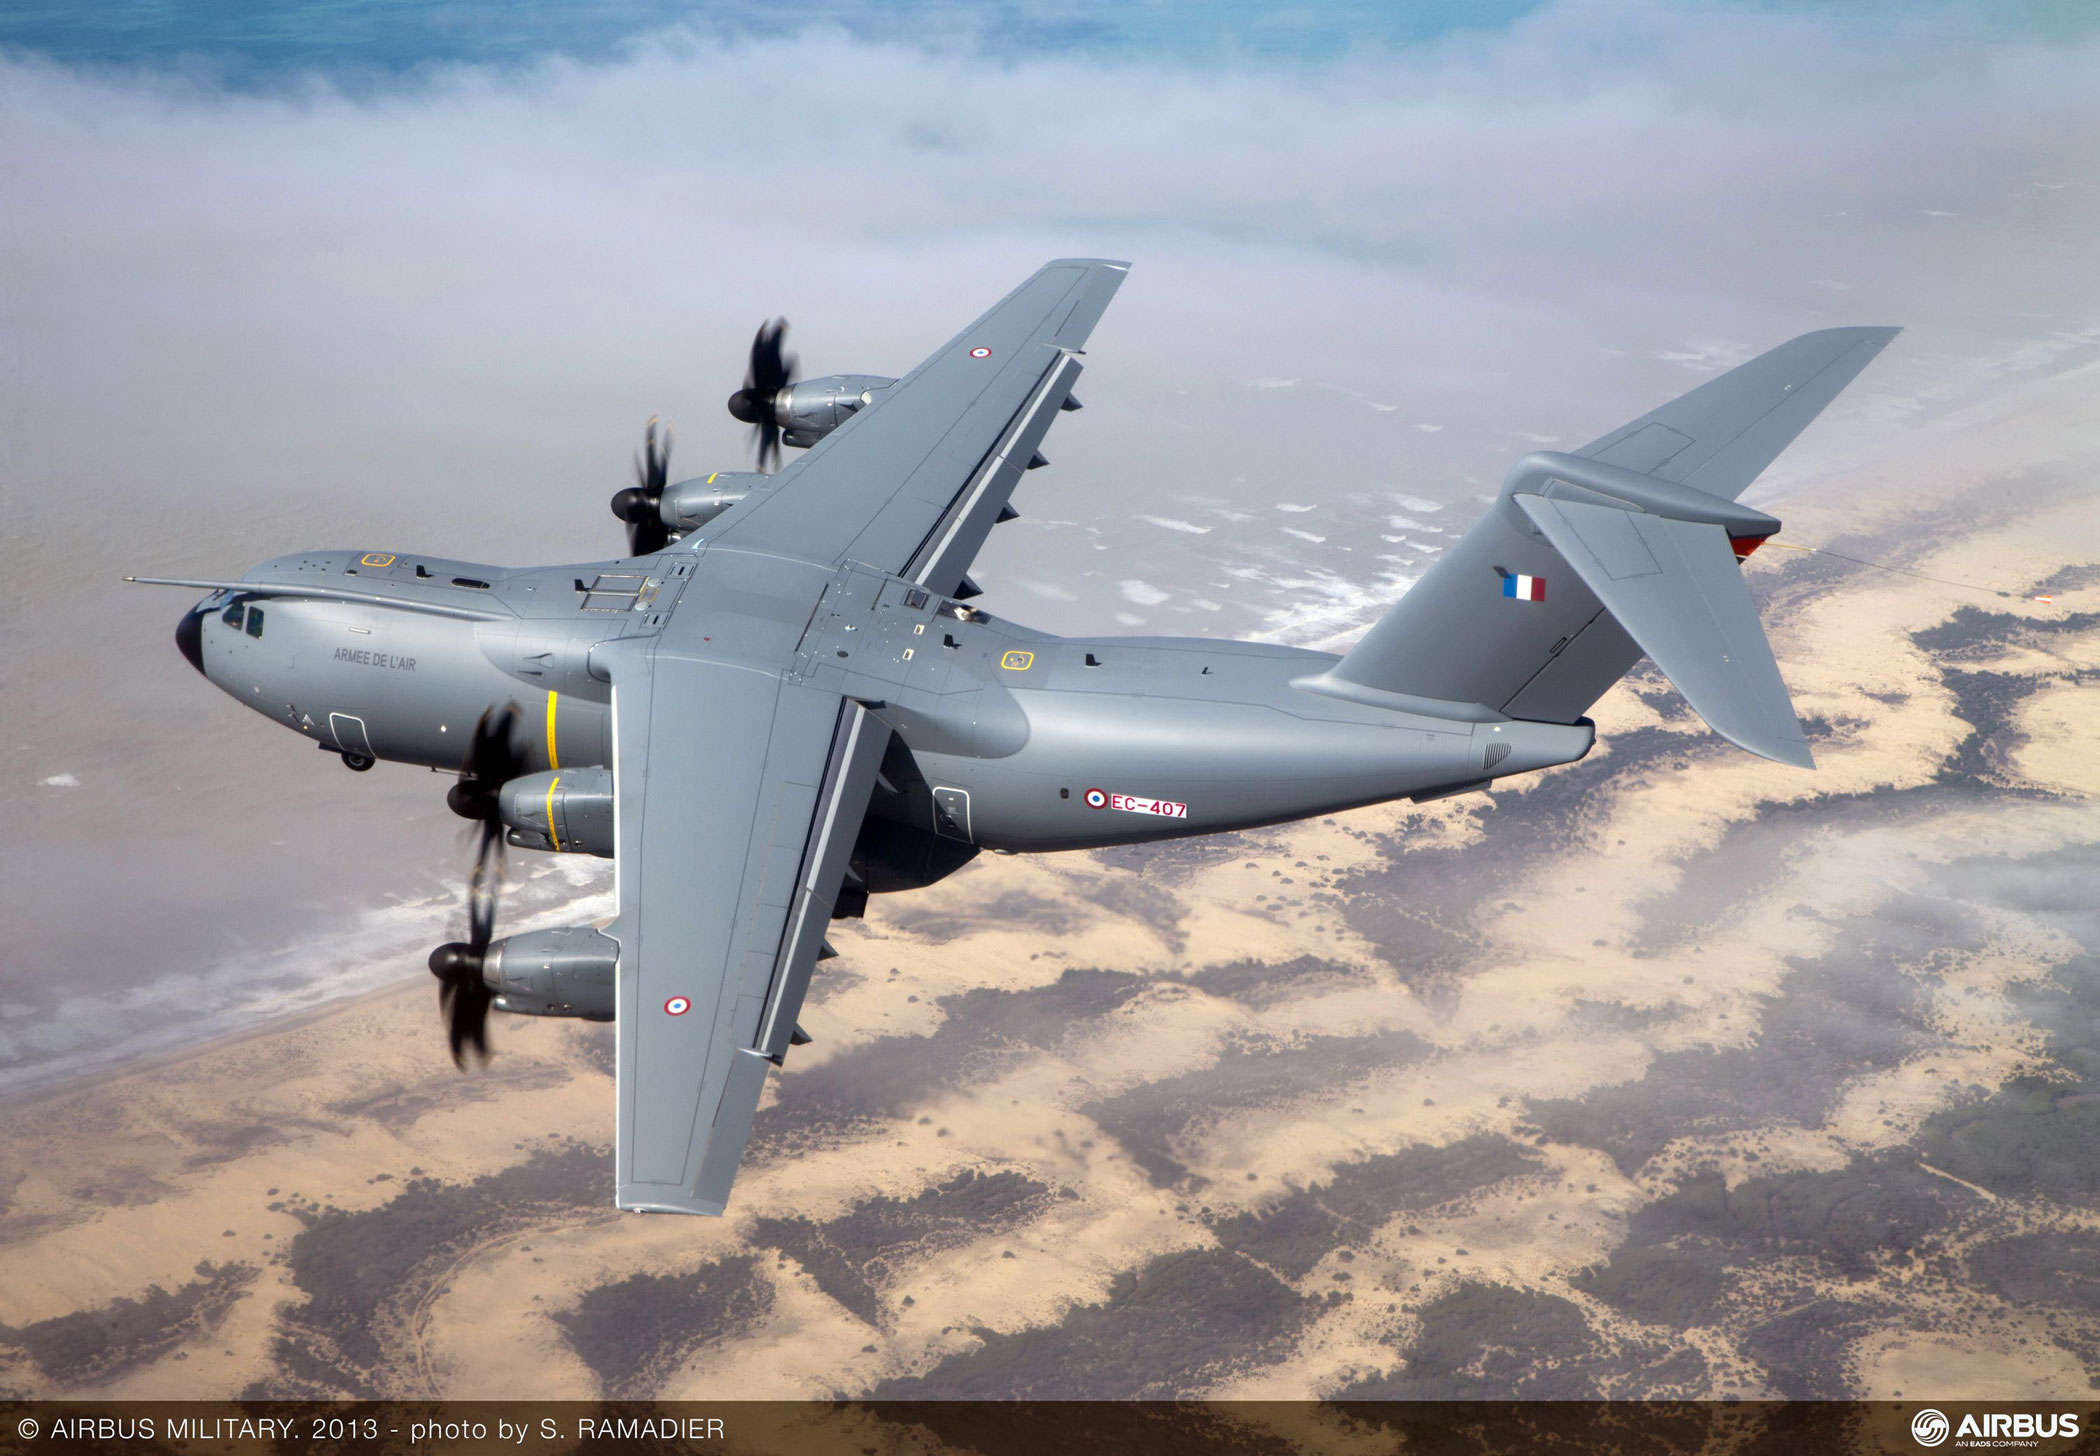

In [25]:
from IPython.display import Image
Image(basename(url))

In [ ]:
https://www.bobaedream.co.kr/list?code=national # query, query string 구성 ?로 구분

In [26]:
url = 'https://www.bobaedream.co.kr/list?code=national'

In [27]:
response = requests.get(url)

In [28]:
response.status_code

200

In [29]:
response.headers

{'Date': 'Mon, 21 Nov 2022 06:45:16 GMT', 'Server': 'Apache', 'Content-Location': 'list.php', 'Vary': 'negotiate,Accept-Encoding', 'TCN': 'choice', 'Set-Cookie': '@s_page=1; path=/, @s_cond=deleted; expires=Sun, 21-Nov-2021 06:45:15 GMT; path=/, @s_order=1eeoofdeootdeoo0eeoo8geootdeooedeoo3eeoo2feoo5eeoordeootdeooieeoo; path=/, @pagescale=30; path=/, @s_code=national; path=/', 'Content-Encoding': 'gzip', 'Keep-Alive': 'timeout=15, max=10000', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/html'}

In [30]:
response.encoding

'ISO-8859-1'

In [31]:
response.text[300:500]

'tent="IE=edge" />\r\n  <meta name="viewport" content="width=1100, user-scalable=yes"/>\r\n  <title>êµ\xadì\x82°ì°¨ê²\x8cì\x8b\x9cí\x8c\x90 | ë³´ë°°ë\x93\x9cë¦¼ ì»¤ë®¤ë\x8b\x88í\x8b°</title>\r\n  <META NAME="KEYWORDS" CONTENT="ì¤\x91ê³\xa0ì°¨ ë³´ë°°'

In [32]:
response.encoding='UTF-8'

In [33]:
response.text[300:500]

'tent="IE=edge" />\r\n  <meta name="viewport" content="width=1100, user-scalable=yes"/>\r\n  <title>국산차게시판 | 보배드림 커뮤니티</title>\r\n  <META NAME="KEYWORDS" CONTENT="중고차 보배드림" />\r\n  <META NAME="DESCRIPTION" CON'

# 사용자 헤더

Request 사용시 Http methods에 전달하는 인자는 Dict, Tuple로 전달할 수 있다.

```python
>>> import json
>>> url = 'https://api.github.com/some/endpoint'
>>> payload = {'some': 'data'}
>>> headers = {'content-type': 'application/json'}

>>> r = requests.post(url, data=json.dumps(payload), headers=headers)
```


```python
params = dict([('name', 'test'), ('name2', 'test2')])
response = requests.get('http://httpbin.org/get', params=params)
```

다음같이 json()으로 전달된 결과를 확인할 수 있다. dict는 키 값이 유일하므로 중복된 키는 재정의 되므로 주의해야 한다.

In [ ]:
params = dict([('name', 'test'), ('name', 'test1'), ('name2', 'test2')])
response = requests.get('http://httpbin.org/get', params=params)
response.json()

키 값이 중복되야 할 경우는 튜플을 사용한다.

In [ ]:
params = (('name', 'test'), ('name', 'test1'), ('name2', 'test2'))
response = requests.get('http://httpbin.org/get', params=params)
response.json()

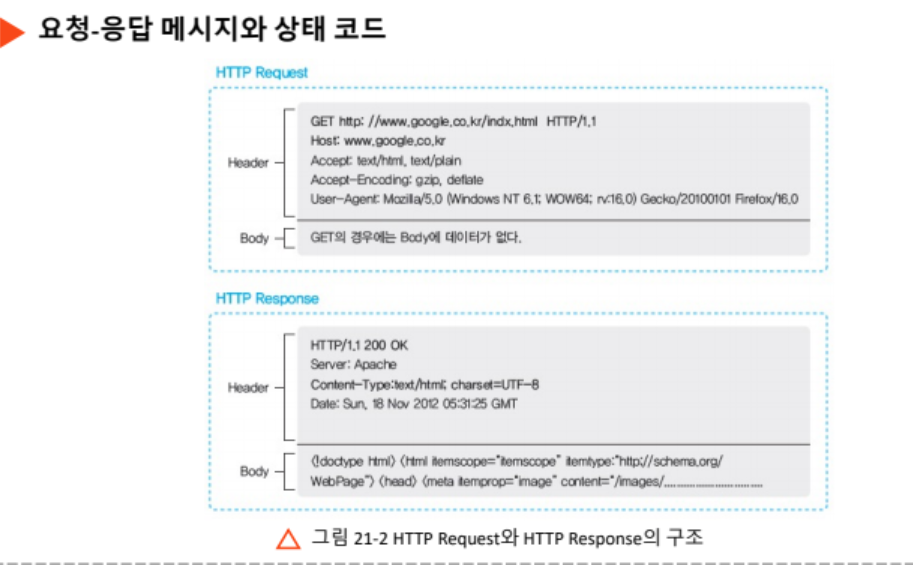

## User-Agent

[User-Agent](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent)는 Http Request Header 로 앱 종류, 오에스, 소스트웨어 벤더 등 정보를 포함하고 있다.

```
Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0
Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0
```

Chrome

```
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36
```

Opera

```
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36 OPR/38.0.2220.41
```

Safari

```
Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like Mac OS X) AppleWebKit/603.1.30 (KHTML, like Gecko) Version/10.0 Mobile/14E304 Safari/602.1
```

IE

```
Mozilla/5.0 (compatible; MSIE 9.0; Windows Phone OS 7.5; Trident/5.0; IEMobile/9.0)
```

### User-Agent 접근 방지

In [ ]:
requests.get('https://namu.wiki/RecentChanges')

In [34]:
response = requests.get('https://namu.wiki/RecentChanges')
response.status_code

403

In [35]:
response.reason

'Forbidden'

In [36]:
response.headers

{'Date': 'Mon, 21 Nov 2022 07:05:22 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'close', 'CF-Chl-Bypass': '1', 'Referrer-Policy': 'same-origin', 'Permissions-Policy': 'accelerometer=(),autoplay=(),camera=(),clipboard-read=(),clipboard-write=(),fullscreen=(),geolocation=(),gyroscope=(),hid=(),interest-cohort=(),magnetometer=(),microphone=(),payment=(),publickey-credentials-get=(),screen-wake-lock=(),serial=(),sync-xhr=(),usb=()', 'Cache-Control': 'private, max-age=0, no-store, no-cache, must-revalidate, post-check=0, pre-check=0', 'Expires': 'Thu, 01 Jan 1970 00:00:01 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '__cf_bm=JIjA.zmEWy7gfXPNaJ7sAlju.kPzLkJOR827xmtizrQ-1669014322-0-AQKaXvaa1Bt/bL45JJllsR5kLcbYEaLVvoS7aeBbbDG6+AZynjPVqztOCML5SBpkgx/aqMvvv9MrXx7AIbvRXJ8=; path=/; expires=Mon, 21-Nov-22 07:35:22 GMT; domain=.namu.wiki; HttpOnly; Secure; SameSite=None', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31

In [ ]:
response

In [ ]:
response = requests.get('https://namu.wiki/RecentChanges')
response.status_code

User-Agent 전달

헤더는 ` headers=` 로 전달된다.

```python
request_headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 '
                   '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36')
}
response = requests.get('http://movie.naver.com/movie/', headers=request_headers)
```

In [37]:
request_headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 '
                   '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36')
}
r = requests.get('https://namu.wiki/RecentChanges', headers=request_headers)
r.status_code

200

In [40]:
request_headers = {
    'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36')
}
r = requests.get('https://namu.wiki/RecentChanges', headers=request_headers)
r.status_code

200

 ## 참고
 https://developers.whatismybrowser.com/useragents/explore/operating_system_name/windows/

In [ ]:
params = {'name': 'test', 'name': 'test1', 'name2': 'test2'}

response = requests.get('http://httpbin.org/get', params=params)
response.json()

In [ ]:
response.status_code

GET과 같이 파라미터는 dict, tuple 모두 제공한다. 헤더는 동일하다. 사용한 예제이다.

In [ ]:
params = {'name': 'test', 'name': 'test1', 'name2': 'test2'}
request_headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36 OPR/38.0.2220.41'
}
response = requests.post('http://httpbin.org/post', params=params, headers=request_headers)
response.json()

## referer

세션을 통해 갱신하거나 

```python
s = requests.Session()
s.headers.update({'referer': my_referer})
s.get(url)
```

요청시 헤더에 `Referer` 에 담는다

In [ ]:
req_headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'),
    "Referer": "https://finance.naver.com/item/sise.nhn?code=40128"
}

In [ ]:
req_headers["Referer"] =  "https://finance.naver.com/item/sise.nhn?code=40128"

# POST

Request.post() 도 사용법은 get()과 유사하다.

In [ ]:
response = requests.post('http://httpbin.org/post')
response.json()

### POST와 json

json 인자로 처리해주면 내부에서 자동으로 json.dump 처리한다.

In [ ]:
import json
 
json_data = {'k1': 'v2', 'k2': [1,2,3], 'name': 'rednooby'}
 
# json포맷 문자열로 변환 후, data인자로 지정
#json_string = json.dumps(json_data)#문자열로 변환
#response = requests.post('http://httpbin.org/post', data=json_data)#서버로 보낸다
 
#json= 으로 처리해주면 내부에서 자동으로 json.dump 처리를 하기때문에 7째줄이 필요없겠죠
response = requests.post('http://httpbin.org/post', json=json_data)
print(response.json())

### Form

post방식은 application/x-www-form-urlencoded 방식으로 데이터 인코딩이 되는데,

Post로 Form 전송시에는dict로 선언한 data 인자를 사용한다.

In [ ]:
data = {'name': 'test', 'name': 'test1', 'name2': 'test2'}
response = requests.post('http://httpbin.org/post', data=data)
response.json()

data인자로 (Key, value)형식의 tuple 지정: 동일 Key의 인자를 다수 지정 가능

In [ ]:
data = (('name','test'),('name','test1'),('name2','test2'))
response = requests.post('http://httpbin.org/post', data=data)
response.json()

#### 파일 업로드

```python
import requests
from bs4 import BeautifulSoup
 
files = {
    'photo1': open('C:\\f1.jpg', 'rb'),#rb: 읽기 바이러니모드
    'photo2': open('C:\\f2.jpg', 'rb'),
    'photo3': ('f3.jpg', open('C:\\f3.jpg', 'rb'), 'image/jpeg', {'Expires': '0'}),
#                   파일명        파일오브젝트         컨텍트타입        헤더
#photo1과 2는 단순하기 때문에 3처럼 넣는것이 베스트
}
post_params = {'k1': 'v1'}
response = requests.post('http://httpbin.org/post', files=files, data=post_params)
print(response)
print(response.json())
```

In [ ]:
data = {'Authorization': 'KakaoAK 0370117a8c7eb4fcb2835cf8bebae51b'}
response = requests.post('https://dapi.kakao.com/v2/search/web?query=신혜선&sort&page=1&size=15', data=data)
response.json()

# SSL Certification

https 사이트에 요청시

```python
url = "https://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd={}".format(code) 
html = requests.get(url, headers=request_headers).text 
```

아래 같은 SSL 에러가 발생.



이런 경우는 보통 내부 시스템 REST API를 호출을 하는데 발생하는데, 보통 내부 시스템들은 SSL 인증서로 local 인증서를 쓰기 때문이다.

requests 모듈에서 앞에서 옵션으로 인증서를 무시를 하거나 ssl 모듈로 unverified context 를 사용할 수 있다.

### requests 모듈

Reuqests의 [ssl-cert-verification](https://2.python-requests.org/en/v2.8.1/user/advanced/#ssl-cert-verification)호스트의 인증서를 검증하는 `veryfy=` 옵션을 사용할 수 있다.

Requests can also ignore verifying the SSL certificate if you set verify to False.

In [ ]:
requests.get('https://httpbin.org', verify=False)

위 경고 메시지도 보이지 않게 하려면

In [ ]:
import urllib3
urllib3.disable_warnings()

In [ ]:
requests.get('https://httpbin.org', verify=False)

네이버 주식정보 페이지에 접근해 보자.

In [ ]:
request_headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36')
}
url = "https://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=035720" 
html = requests.get(url, headers=request_headers, verify=False).text

html[:100]

### ssl 모듈 사용


```python
import ssl
context = ssl._create_unverified_context()
result = urlopen("https://en.wikipedia.org/wiki/Kevin_Bacon", context=context)
```

---